## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pickle

## 2. Loading the datasets

In [2]:
df1 = pd.read_csv("/home/shree/Documents/IBM_NalaiyaThiran/Datasets/Cleaned Datasets/round_1.csv")
df2 = pd.read_csv("/home/shree/Documents/IBM_NalaiyaThiran/Datasets/Cleaned Datasets/round_2.csv")
df3 = pd.read_csv("/home/shree/Documents/IBM_NalaiyaThiran/Datasets/Cleaned Datasets/round_3.csv")
df4 = pd.read_csv("/home/shree/Documents/IBM_NalaiyaThiran/Datasets/Cleaned Datasets/round_4.csv")

## 3. Adding the 'round' column

In [3]:
df1['ROUND'] = 1
df2['ROUND'] = 2
df3['ROUND'] = 3
df4['ROUND'] = 4

In [4]:
df1.head()

,S NO,APPLICATION NUMBER,NAME OF THE CANDIDATE,AGGREGATE MARK,RANK,COMMUNITY,COLLEGE CODE,BRANCH CODE,ALLOTTED CATEGORY,ROUND
0,1,316999,J NITHYASREE,200.0,1,MBCV,1,CS,OC,1
1,2,251701,SREENITHI A,200.0,3,BC,1,CS,OC,1
2,3,340928,UMA SHWETHA P L,200.0,6,OC,1,EC,OC,1
3,4,258426,SUBHASRI SHREYA S L,200.0,7,BC,2006,CM,OC,1
4,5,243792,Sarathivasan s,200.0,8,BC,1,CS,OC,1


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10118 entries, 0 to 10117
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   S NO                   10118 non-null  int64  
 1   APPLICATION NUMBER     10118 non-null  int64  
 2   NAME OF THE CANDIDATE  10118 non-null  object 
 3   AGGREGATE MARK         10118 non-null  float64
 4   RANK                   10118 non-null  int64  
 5   COMMUNITY              10118 non-null  object 
 6   COLLEGE CODE           10118 non-null  int64  
 7   BRANCH CODE            10118 non-null  object 
 8   ALLOTTED CATEGORY      10118 non-null  object 
 9   ROUND                  10118 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 790.6+ KB


In [6]:
df2.head()

,S NO,APPLICATION NUMBER,NAME OF THE CANDIDATE,AGGREGATE MARK,RANK,COMMUNITY,COLLEGE CODE,BRANCH CODE,ALLOTTED CATEGORY,ROUND
0,1,339809,Derin Patrick J,199.500,15,BC,1149,AD,OC,2
1,2,317367,M NIKKETHA,197.000,436,SC,2,CL,SC,2
2,3,292209,shyamalan senthil,195.500,1013,BC,1324,CS,OC,2
3,4,241046,SANTHIYA E,195.350,1087,BC,3011,IT,OC,2
4,5,309601,SHAJI S,195.185,1150,OC,1026,CS,OC,2


In [7]:
df3.head()

,S NO,APPLICATION NUMBER,NAME OF THE CANDIDATE,AGGREGATE MARK,RANK,COMMUNITY,COLLEGE CODE,BRANCH CODE,ALLOTTED CATEGORY,ROUND
0,1,312150,CHANDINI D,193.900,2122,BC,2751,IT,BC,3
1,2,215831,KANIHA.K,193.185,2612,BC,4024,EC,BC,3
2,3,351148,ABDULLAH THOAHA YASEEN Y,192.500,3516,BCM,1422,EC,BCM,3
3,4,299636,SANGEETHA R,192.110,3814,BC,4678,EC,BC,3
4,5,240841,JANAGAN A,190.395,6493,MBCV,2708,CS,MBCV,3


In [8]:
df4.head()

,S NO,APPLICATION NUMBER,NAME OF THE CANDIDATE,AGGREGATE MARK,RANK,COMMUNITY,COLLEGE CODE,BRANCH CODE,ALLOTTED CATEGORY,ROUND
0,1,209679,HARISH K,188.91,9322,MBCV,1520,CS,MBCV,4
1,2,212066,SANJIV KANNAA J,188.50,10002,SC,1140,CS,SC,4
2,3,351955,A LINIYA DHAYALINI,186.50,13624,BC,1427,EC,OC,4
3,4,370640,KALAIVANAN K,185.50,15679,BC,1325,ME,OC,4
4,5,359595,ARAVIND I,185.32,16123,MBCV,1412,CS,MBCV,4


## 4. Merging 4 dataframes into 1

In [9]:
df = pd.concat([df1, df2, df3, df4],ignore_index =True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80068 entries, 0 to 80067
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   S NO                   80068 non-null  int64  
 1   APPLICATION NUMBER     80068 non-null  int64  
 2   NAME OF THE CANDIDATE  80068 non-null  object 
 3   AGGREGATE MARK         80068 non-null  float64
 4   RANK                   80068 non-null  int64  
 5   COMMUNITY              80068 non-null  object 
 6   COLLEGE CODE           80068 non-null  int64  
 7   BRANCH CODE            80068 non-null  object 
 8   ALLOTTED CATEGORY      80068 non-null  object 
 9   ROUND                  80068 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 6.1+ MB


## 5. Dropping unnecessary columns

In [10]:
df = df.drop(["S NO","APPLICATION NUMBER","NAME OF THE CANDIDATE"] , axis=1)
df.head()

,AGGREGATE MARK,RANK,COMMUNITY,COLLEGE CODE,BRANCH CODE,ALLOTTED CATEGORY,ROUND
0,200.0,1,MBCV,1,CS,OC,1
1,200.0,3,BC,1,CS,OC,1
2,200.0,6,OC,1,EC,OC,1
3,200.0,7,BC,2006,CM,OC,1
4,200.0,8,BC,1,CS,OC,1


## 6. Renaming Column Names

In [11]:
df.rename(columns = {'AGGREGATE MARK':'AGGREGATE_MARK','COLLEGE CODE':'COLLEGE_CODE','BRANCH CODE':'BRANCH_CODE','ALLOTTED CATEGORY':'ALLOTTED_CATEGORY'}, inplace = True)

## 7. Checking for Null Values

In [12]:
df.isnull().sum()

AGGREGATE_MARK       0
RANK                 0
COMMUNITY            0
COLLEGE_CODE         0
BRANCH_CODE          0
ALLOTTED_CATEGORY    0
ROUND                0
dtype: int64

In [13]:
df['COLLEGE_CODE']= df['COLLEGE_CODE'].apply(str)
df.head()

,AGGREGATE_MARK,RANK,COMMUNITY,COLLEGE_CODE,BRANCH_CODE,ALLOTTED_CATEGORY,ROUND
0,200.0,1,MBCV,1,CS,OC,1
1,200.0,3,BC,1,CS,OC,1
2,200.0,6,OC,1,EC,OC,1
3,200.0,7,BC,2006,CM,OC,1
4,200.0,8,BC,1,CS,OC,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80068 entries, 0 to 80067
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AGGREGATE_MARK     80068 non-null  float64
 1   RANK               80068 non-null  int64  
 2   COMMUNITY          80068 non-null  object 
 3   COLLEGE_CODE       80068 non-null  object 
 4   BRANCH_CODE        80068 non-null  object 
 5   ALLOTTED_CATEGORY  80068 non-null  object 
 6   ROUND              80068 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 4.3+ MB


## 8. Uni-Variate Visualization

### Histogram

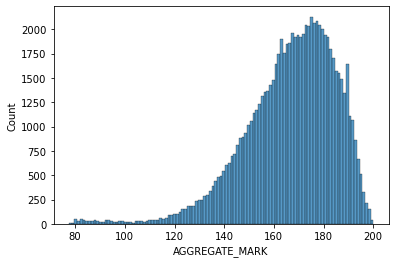

In [15]:
sns.histplot(df['AGGREGATE_MARK'])
plt.show()

## 9. Bi-Variate Visualization

### Scatter Plot

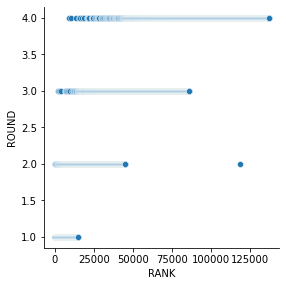

In [16]:
sns.pairplot(df, x_vars='RANK', y_vars='ROUND', height=4, aspect=1, kind='scatter')

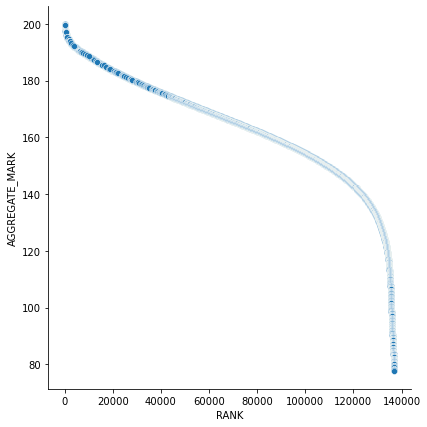

In [17]:
sns.pairplot(df, x_vars='RANK', y_vars='AGGREGATE_MARK', height=6, aspect=1, kind='scatter')

## 10. Multi-Variate visualization

<AxesSubplot:>

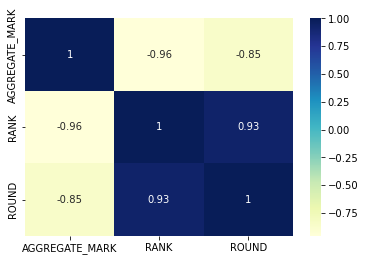

In [18]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)

## 11.Shuffling of rows

In [19]:
df = df.sample(frac = 1)
df.head()

,AGGREGATE_MARK,RANK,COMMUNITY,COLLEGE_CODE,BRANCH_CODE,ALLOTTED_CATEGORY,ROUND
16618,181.900,23893,MBCV,1317,ME,OC,2
64243,152.480,104068,SC,5,CZ,SC,4
57230,158.500,89945,BCM,2740,PH,BCM,4
49105,163.155,77073,SCA,3826,BM,SCA,3
65745,151.000,107049,SC,4959,CS,SC,4


## 12. Predicting RANK from AGGREGATE_MARK

### Spliting dependent and independent variables

In [20]:
X = df['AGGREGATE_MARK']
y = df['RANK']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 0)

In [22]:
X_train
X_train=X_train.to_numpy()
X_train = X_train.reshape(-1, 1)

In [23]:
y_train
y_train=y_train.to_numpy()
y_train = y_train.reshape(-1, 1)

In [24]:
y_test
y_test =y_test.to_numpy()
y_test = y_test.reshape(-1, 1)

In [25]:
X_test
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1, 1)

### Model Building using LINEAR REGRESSION

In [26]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

### Model Building with 100% data

In [27]:
m2r = LinearRegression()
m2r.fit(X.to_numpy().reshape(-1,1), y.to_numpy().reshape(-1,1)) 

LinearRegression()

### Finding accuracy

In [31]:
lr.score(X_test,y_test)

0.91923217895487

In [32]:
m2r.score(X_test, y_test)

0.9193808749948926

### Exporting the model to pickle file

In [50]:
#with open('./marks_to_rank.pickle','wb') as f:
#    pickle.dump(m2r,f)

## 13. Predicting ROUND from RANK 

### Spliting dependent and independent variables

In [34]:
X1 = df['RANK']
y1= df['ROUND']

In [35]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size = 0.9, test_size = 0.1, random_state = 0)

In [36]:
X1_train
X1_train=X1_train.to_numpy()
X1_train = X1_train.reshape(-1, 1)

In [37]:
y1_train
y1_train=y1_train.to_numpy()
y1_train = y1_train.reshape(-1, 1)

In [38]:
X1_test
X1_test=X1_test.to_numpy()
X1_test = X1_test.reshape(-1, 1)

In [39]:
y1_test
y1_test=y1_test.to_numpy()
y1_test = y1_test.reshape(-1, 1)

### Model Building

In [40]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X1_train,y1_train)

LinearRegression()

### Model Building using 100% data

In [41]:
r2r = LinearRegression()
r2r.fit(X1.to_numpy().reshape(-1,1), y1.to_numpy().reshape(-1,1))

LinearRegression()

### Finding the Accuracy

In [42]:
lr.score(X1_test,y1_test)

0.8663557363021608

In [43]:
r2r.score(X1_test, y1_test)

0.8663696319638035

### Exporting model to pickle file

In [49]:
#with open('./rank_to_round.pickle','wb') as f:
#    pickle.dump(r2r,f)